In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

In [18]:
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})


In [75]:
songs_df = pd.read_csv("/Volumes/Macintosh HD – dane/GitHub/masters/first semester/Unsupervised Learning/article_2/songs_vectors.csv", index_col=0)

In [76]:
column_names = songs_df.columns

In [77]:
songs_df = songs_df.T

In [22]:
# scaling data
sc = StandardScaler()
sc.fit(songs_df)
df_transformed = sc.transform(songs_df)

In [23]:
df_transformed.shape

(48, 300)

In [24]:
# initialize PCA
pca = PCA()
df_pca = pca.fit_transform(df_transformed)

In [25]:
# amount of explained variance
variance_pca = pca.explained_variance_ratio_

In [26]:
# cumulative explained variance
cumulative_variance = np.cumsum(variance_pca)

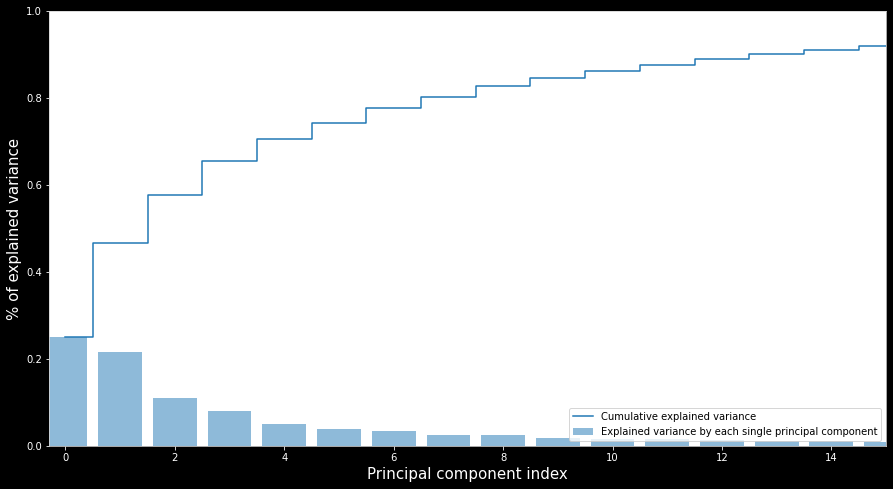

In [27]:
plt.rcParams["figure.figsize"] = (15,8)
plt.bar(range(0, len(variance_pca)), 
        variance_pca, 
        alpha=0.5,
        align='center',
        label='Explained variance by each single principal component'
       
)
plt.step(range(0, len(variance_pca)),
        cumulative_variance,
        where='mid',
        label='Cumulative explained variance')
plt.xlabel('Principal component index', fontsize=15)
plt.ylabel('% of explained variance', fontsize=15)
plt.xlim(-0.3, 15)
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

In [28]:
# making PCA with 2 components
pca = PCA(n_components=2)
pca_2 = pca.fit_transform(df_transformed)
pca_df = pd.DataFrame(pca_2, columns = ['PC1', 'PC2'])

In [29]:
pca_df.head()

,PC1,PC2
0,1.198047,-9.893591
1,7.682520,20.862784
2,-8.635584,-0.994121
3,-0.949580,9.255321
4,2.632332,8.285964


In [30]:
print("Explained variance with 2 components: {}%".format(np.round(np.sum(pca.explained_variance_ratio_) * 100, 2)))

Explained variance with 2 components: 46.64%


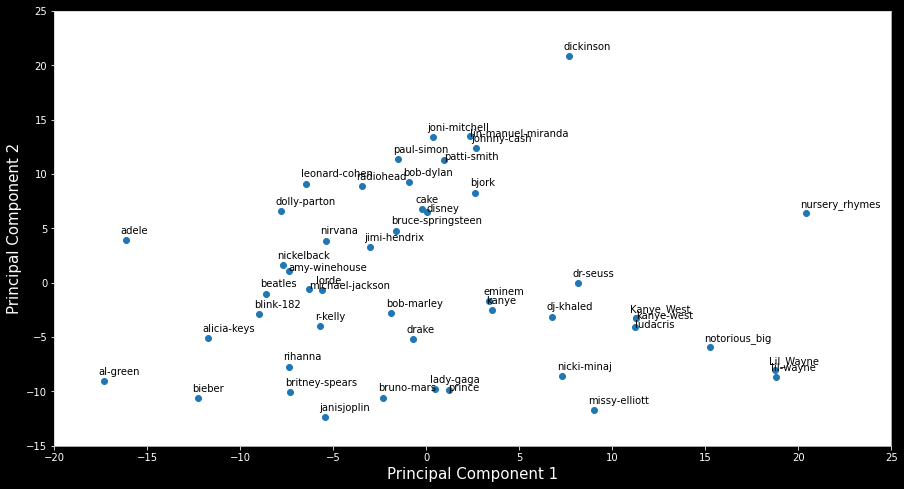

In [31]:
fix, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (15,8)
ax.scatter(pca_df['PC1'], 
            pca_df['PC2'])
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.xlim(-20, 25)
plt.ylim(-15, 25)

xax = pca_df['PC1']
yax = pca_df['PC2']
for i, txt in enumerate(column_names):

    not_to_move = ['ludacris', 'prince', 'patti-smith', 'michael-jackson', 'amy-winehouse', 'lin-manuel-miranda', 'disney', 'kanye-west']
    if txt not in not_to_move:
        ax.annotate(txt, (xax[i] - 0.3, yax[i] + 0.6))
        
    else:
         ax.annotate(txt, (xax[i], yax[i]))
    


In [79]:
cos_sim = np.dot(songs_df.T['dickinson'], songs_df.T['al-green']) / (np.linalg.norm(songs_df.T['dickinson'] * np.linalg.norm(songs_df.T['al-green'])))

In [80]:
cos_sim

0.8341450914028571

In [36]:
cos_sim = []
for column in column_names:
    a = songs_df[column]
    for i in column_names:
        b = songs_df[i]
        similarity = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
        cos_sim.append(similarity) 

In [37]:
cos_sim_matrix = np.reshape(cos_sim, (48, 48))

In [38]:
cos_sim_df = pd.DataFrame(cos_sim_matrix, index = column_names, columns = column_names)

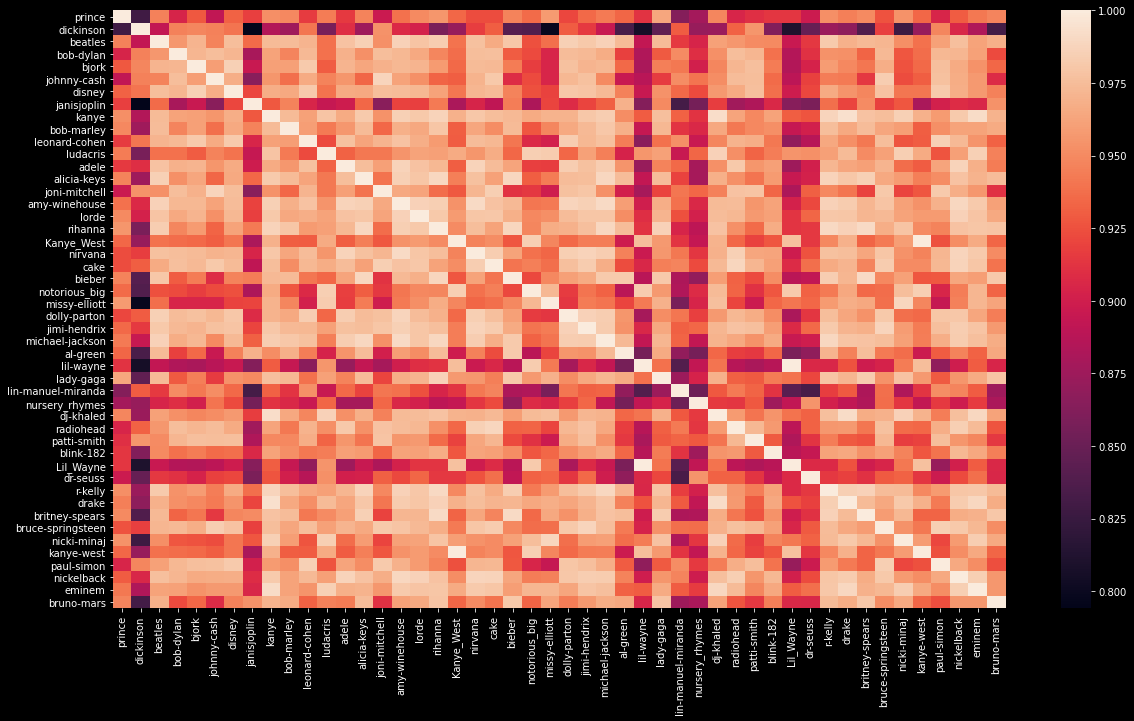

In [39]:
plt.rcParams["figure.figsize"] = (20,11)
fig = sns.heatmap(cos_sim_df)

In [40]:
similarities_with_artists = []
for column in column_names:
    a = songs_df[column]
    for i in column_names:
        b = songs_df[i]
        similarity = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
        similarities_with_artists.append([column, i, similarity]) 

In [41]:
similarities_with_artists[0:5]

[['prince', 'dickinson', 0.8289102770801587],
 ['prince', 'beatles', 0.9453479245589446],
 ['prince', 'bob-dylan', 0.9037410201356254],
 ['prince', 'bjork', 0.9276630644531176]]

In [42]:
similarities_df = pd.DataFrame(similarities_with_artists, columns = ['artist1', 'artist2', 'cosine_similarity']).reset_index()

In [43]:
similarities_df['cosine_similarity'] = np.round(similarities_df['cosine_similarity'], 7)

In [44]:
similarities_df = similarities_df[(similarities_df['cosine_similarity'] != 1) | (similarities_df['artist1'] != similarities_df['artist2'])]

In [45]:
top10 = similarities_df.sort_values(by='cosine_similarity', ascending=False).head(20).reset_index()

In [46]:
top10 = top10.iloc[::2, :]

In [47]:
top10['artist1_artist2'] = top10['artist1'] + ' and ' + top10['artist2']

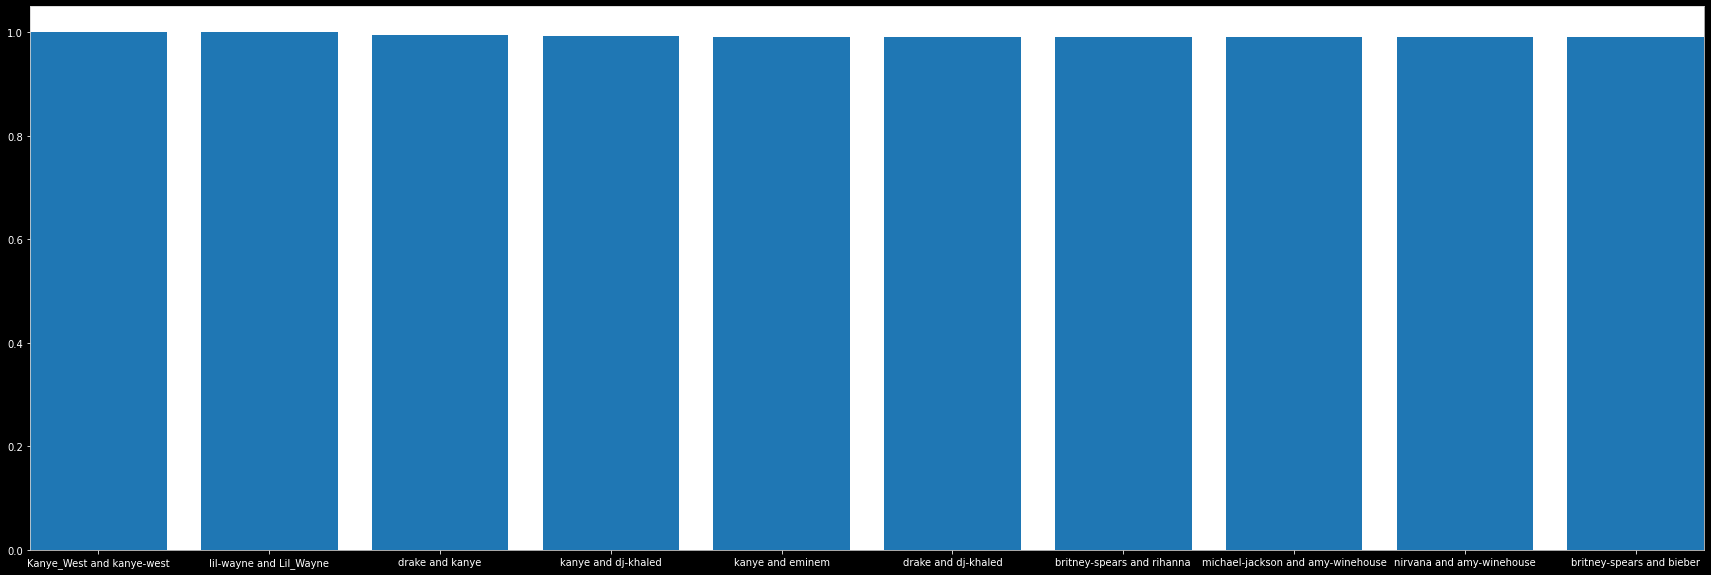

In [48]:
plt.rcParams["figure.figsize"] = (30,10)
fig = plt.bar(x='artist1_artist2', height='cosine_similarity', 
            data=top10,
            width = 0.8)
plt.margins(x=0)

In [49]:
bottom10 = similarities_df.sort_values(by='cosine_similarity', ascending=False).tail(20).reset_index()

In [50]:
bottom10 = bottom10.iloc[::2, :]

In [51]:
bottom10

,level_0,index,artist1,artist2,cosine_similarity
0,75,75,dickinson,al-green,0.834145
2,1477,1477,lin-manuel-miranda,dr-seuss,0.833334
4,366,366,janisjoplin,lin-manuel-miranda,0.831733
6,95,95,dickinson,bruno-mars,0.830757
8,1,1,prince,dickinson,0.828910
10,2017,2017,nicki-minaj,dickinson,0.827543
12,84,84,dickinson,Lil_Wayne,0.810339
14,1345,1345,lil-wayne,dickinson,0.805703
16,1105,1105,missy-elliott,dickinson,0.797377
18,337,337,janisjoplin,dickinson,0.794100


In [52]:
bottom10['artist1_artist2'] = bottom10['artist1'] + ' and ' + bottom10['artist2']

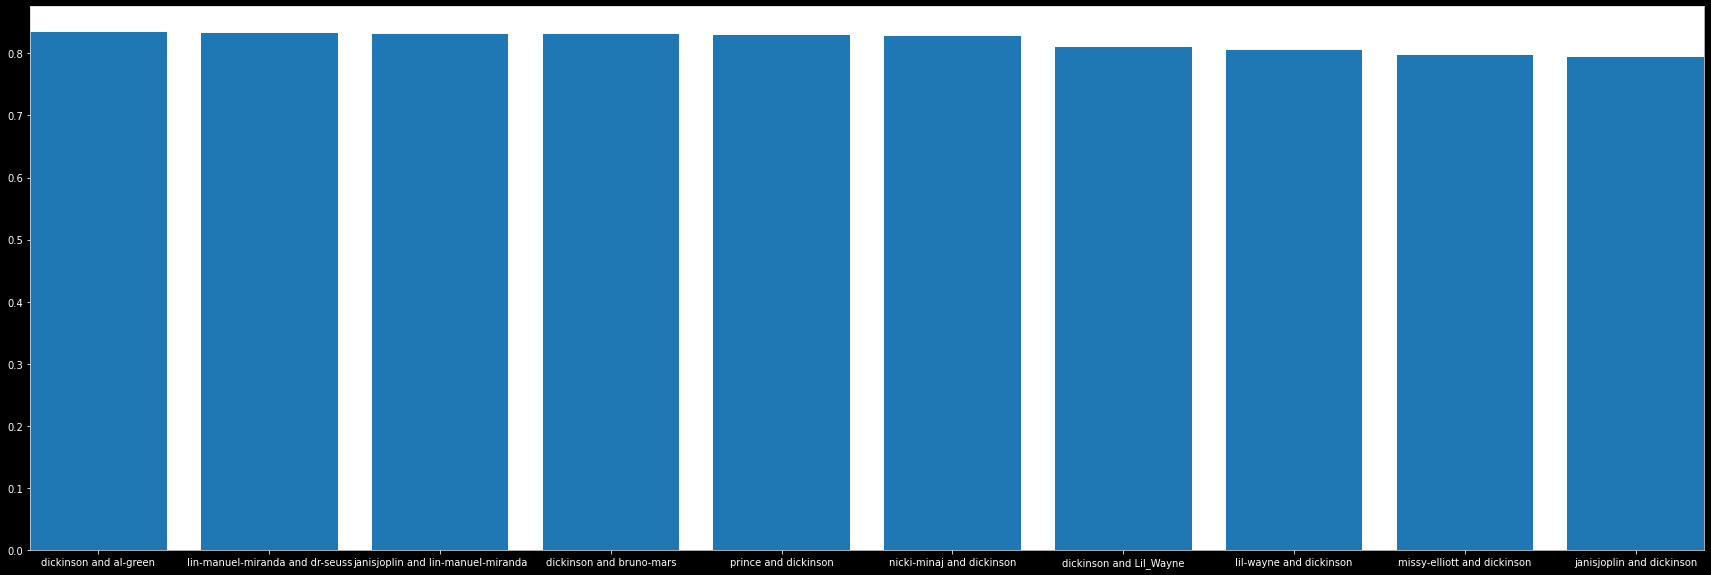

In [53]:
plt.rcParams["figure.figsize"] = (30,10)
fig = plt.bar(x='artist1_artist2', height='cosine_similarity', 
            data=bottom10,
            width = 0.8)
plt.margins(x=0)

<h3> Applying t-sne <h3>

In [115]:
songs_df = songs_df.reset_index()

In [163]:
tsne = TSNE(n_components=2, perplexity = 5)
tsne_fit = tsne.fit_transform(songs_df.iloc[:, 1:])


/Users/dominik/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/dominik/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


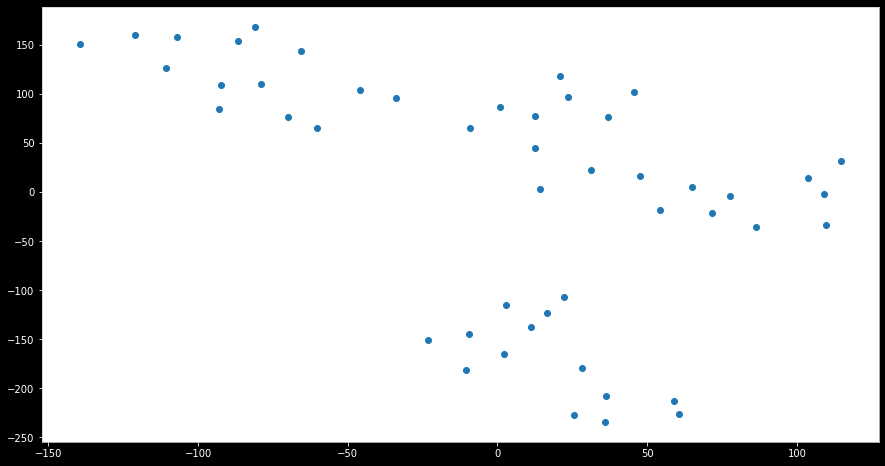

In [164]:
fix, ax = plt.subplots()
#plt.rcParams["figure.figsize"] = (15,8)
ax.scatter(tsne_fit[:, 0], 
            tsne_fit[:, 1])
#plt.xlim(-20, 25)
#plt.ylim(-15, 25)

    

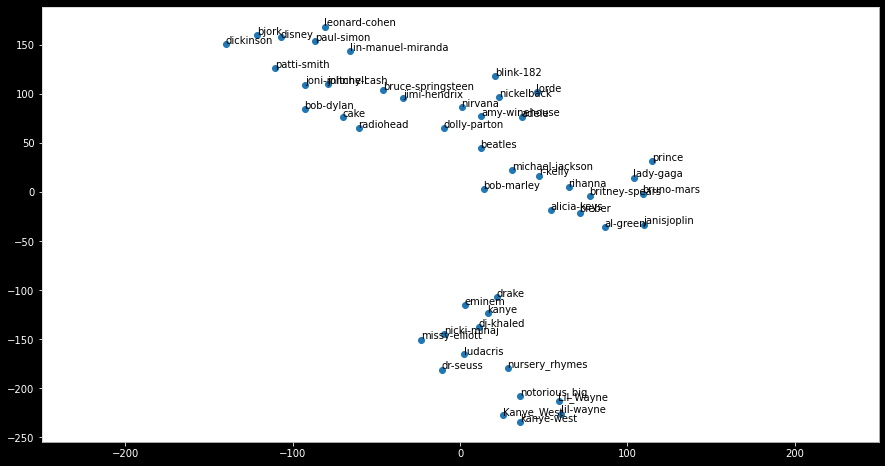

In [165]:
fix, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (15,8)
ax.scatter(tsne_fit[:, 0], 
            tsne_fit[:, 1])
plt.xlim(-250, 250)
#plt.ylim(-15, 25)

xax = tsne_fit[:, 0]
yax = tsne_fit[:, 1]
for i, txt in enumerate(column_names):

    not_to_move = ['ludacris', 'prince', 'patti-smith', 'michael-jackson', 'amy-winehouse', 'lin-manuel-miranda', 'disney', 'kanye-west']
    if txt not in not_to_move:
        ax.annotate(txt, (xax[i] - 0.3, yax[i] + 0.6))
        
    else:
         ax.annotate(txt, (xax[i], yax[i]))